In [1]:
#%matplotlib inline
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from scipy import linalg as LA
             
def genlaplacian(G, x, nodelist=None):
    if x==0:
        D = nx.laplacian_matrix(G).toarray()
    else:
        D = nx.floyd_warshall_numpy(G, nodelist)
        rowsize = D.shape[0]
        for i in range(0, rowsize):
            for j in range(i+1, rowsize):
                if(D[i,j] ==1):
                    D[i,j]= D[j,i] = -1
                else:
                    D[i,j] = D[j,i] = -D[i,j]*(pow(x, (D[i,j]-1)))
            D[i,i] = -1*(D[i].sum())
    return D
              

N   = 20                                           #The number of pixels along a dimension of the image
A   = np.zeros((N, N))                             #The image
Adj = np.zeros((N*N,N*N))                          #Adjacency matrix

#Use 8 neighbors, and fill in the adjacency matrix
dx = [-1, 0, 1, -1, 1, -1, 0, 1];
dy = [-1, -1, -1, 0, 0, 1, 1, 1];
for x in range(1,N+1):
   for y in range(1 , N+1):
       index = (x-1)*N + y-1
       for ne in range(0, len(dx)):
           newx = x + dx[ne]
           newy = y + dy[ne]
           if newx > 0 and newx <= N and newy > 0 and newy <= N:
               index2 = (newx-1)*N + newy-1
               Adj[index, index2]= 1
                

<IPython.core.display.Javascript object>


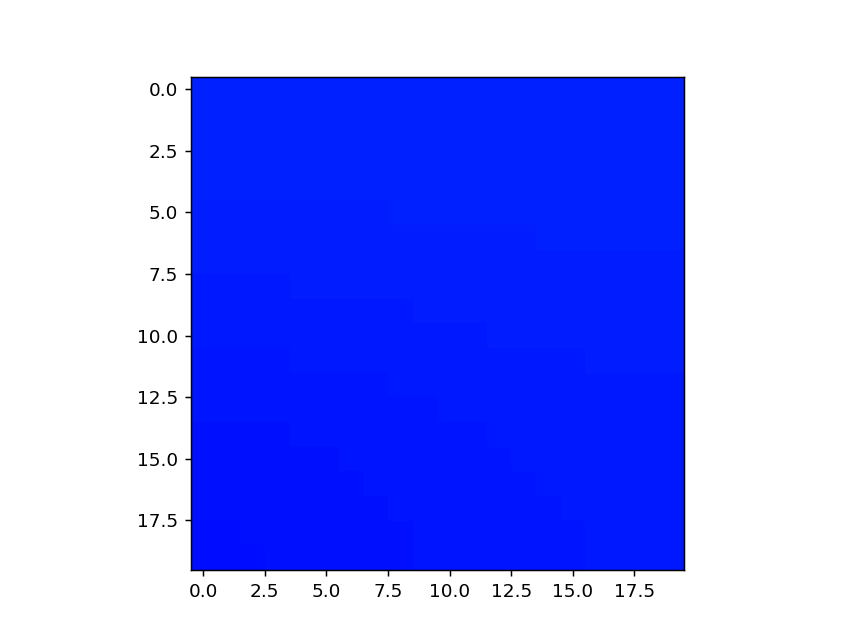

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display
import networkx as nx
import numpy as np
import matplotlib.animation as animation

# displaying the text widget
x_text = widgets.FloatText(description="Enter x value", width=200)
display(x_text)

t_text = widgets.FloatText(description="Enter time", width=200)
display(t_text)

# add button that updates the graph based on the checkboxes
button = widgets.Button(description="Update Animation")
display(button)

#plotting results
fig = plt.figure()

ims = []

# function to deal with the checkbox update button       
def on_button_clicked(b):
    #time = 5.05
    #x = 0.1
    tt= t_text.value
    x = x_text.value
    N = 20
    nodelist= [range(0,400)]
    G = nx.Graph(Adj)
    L = genlaplacian(G,x)
    D, V =LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(N*N,1), order='F')

    #Initial condition (place a few large positive values around and make everything else zero)
    C0 =np.zeros((N,N))
    C0[1:5, 1:5]  = 5
    C0[9:15,9:15] = 10
    C0[1:5, 7:13] = 7
    C0 = np.reshape(C0,(N*N,1), order='F');

    C0V = np.dot((V.conj().transpose()),C0)                      #Transform the initial condition into the coordinate system of the eigenvectors
    
    for t in np.arange(0, tt, 0.05):
        Phi = (C0V* (np.exp(-D*t)));                             #Exponential decay for each component
        Phi = np.dot(V,Phi);                                     #Transform from eigenvector coordinate system to original coordinate system
        Phi =  np.reshape(Phi, (N, N), order='F') 
        im  = plt.imshow(Phi, cmap='jet', animated=True)
        plt.clim(0,10)
        ims.append([im])
          
button.on_click(on_button_clicked)

ani = animation.ArtistAnimation(fig, ims, interval=300, blit=True, repeat_delay=1000)
#plt.colorbar(ims[0], orientation='vertical')
plt.show() 

4
